In [ ]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.24/06


In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import lsfit
reload(lsfit)
from lsfit import *

import include_modules_root as rt
import Kalman_tom

In [10]:
# Figure configuration are saved in this file include_figure_preset.py
from include_figure_preset import * 
# Set Figure font family, fontsize, ticks, etc.
plt_config(family="san-serif", fontsize_multi=1) # or "serif", or an exact font name

# Redefine a function to save figures with common settings 
fig_prefix = "plots/singletrack_LS_"    # It's good to keep figures in a separate folder. Can also be set to None.
fig_format = "jpg"      # for multiple formats, e.g.: "pdf,png"
SAVE_FIG = False         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.
# You can then do `savefig(filename_without_extension)` to save your plots with these settings
savefig = Save_fig(fig_prefix=fig_prefix, exts=fig_format, SAVE= SAVE_FIG, dpi=300)

## Input file, output filenames, etc

In [5]:
#--- Get a list of filenames to process ---
# energy_list = [1, 2, 5, 10, 50, 100, 1000]
energy_list = [0.5, 1, 3, 10, 50, 1000]
file_list = []
for energy in energy_list:
    files=glob.glob(f"{DATA_DIR}/muon_{energy}_GeV/*/*/stat_seedmod.root",)
    #files=util.Utils.sortByExt(files)
    if len(files)>=1:
        file_list.append(files[0])
    if len(files)>1:
        print(f"More than one file for {energy} GeV")
        
energy_list = [0.5, 1, 3, 10]
for energy in energy_list:
    files=glob.glob(f"{DATA_DIR}/pion_{energy}_GeV/*/*/stat_seedmod.root",)
    #files=util.Utils.sortByExt(files)
    if len(files)>=1:
        file_list.append(files[0])
    if len(files)>1:
        print(f"More than one file for {energy} GeV")        
pp.pprint(file_list)

[   '/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_0.5_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_1_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_3_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_10_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_50_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_1000_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_0.5_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_1_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_3_GeV/20230411/185206/stat_seedmod.root',
    '/project/def-mdiamond/tomren/mathusla/dat

In [7]:
os.path.dirname(file_list[0])

'/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_0.5_GeV/20230411/185206'

In [7]:
for filename in file_list:
    print(filename)
    res = lsfit.do_ls(filename)
    # joblib.dump(res, os.path.dirname(filename)+"/ls_fit.joblib")

/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_0.5_GeV/20230411/185206/stat_seedmod.root


  0%|          | 0/40000 [00:00<?, ?it/s]/project/6035200/tomren/jupyter/tracker_analysis/lsfit.py:103: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m.migrad()  # run optimiser
100%|██████████| 40000/40000 [15:14<00:00, 43.76it/s]
/project/6035200/tomren/jupyter/tracker_analysis/lsfit.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "ndigi_inds":np.array(ndigi_inds),


/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_1_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [15:12<00:00, 43.86it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_3_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [15:12<00:00, 43.85it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_10_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [15:10<00:00, 43.93it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_50_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [15:12<00:00, 43.83it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_1000_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [15:10<00:00, 43.92it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_0.5_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [13:41<00:00, 48.69it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_1_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [13:59<00:00, 47.67it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_3_GeV/20230411/185206/stat_seedmod.root


100%|██████████| 40000/40000 [14:48<00:00, 45.04it/s]


/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_10_GeV/20230412/175710/stat_seedmod.root


100%|██████████| 40000/40000 [14:49<00:00, 44.96it/s]


---
## Muon


In [20]:
# --- Load all muon results

energy_list = [0.5, 1, 3, 10, 50, 1000]
results = {}
for energy in energy_list:
    files=glob.glob(f"{DATA_DIR}/muon_{energy}_GeV/*/*/ls_fit.joblib",)
    #files=util.Utils.sortByExt(files)
    if len(files)>=1:
        results[energy] = joblib.load(files[0])
        print(files[0])
    if len(files)>1:
        print(f"More than one file for {energy} GeV")

/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_0.5_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_1_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_3_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_10_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_50_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_1000_GeV/20230411/185206/ls_fit.joblib


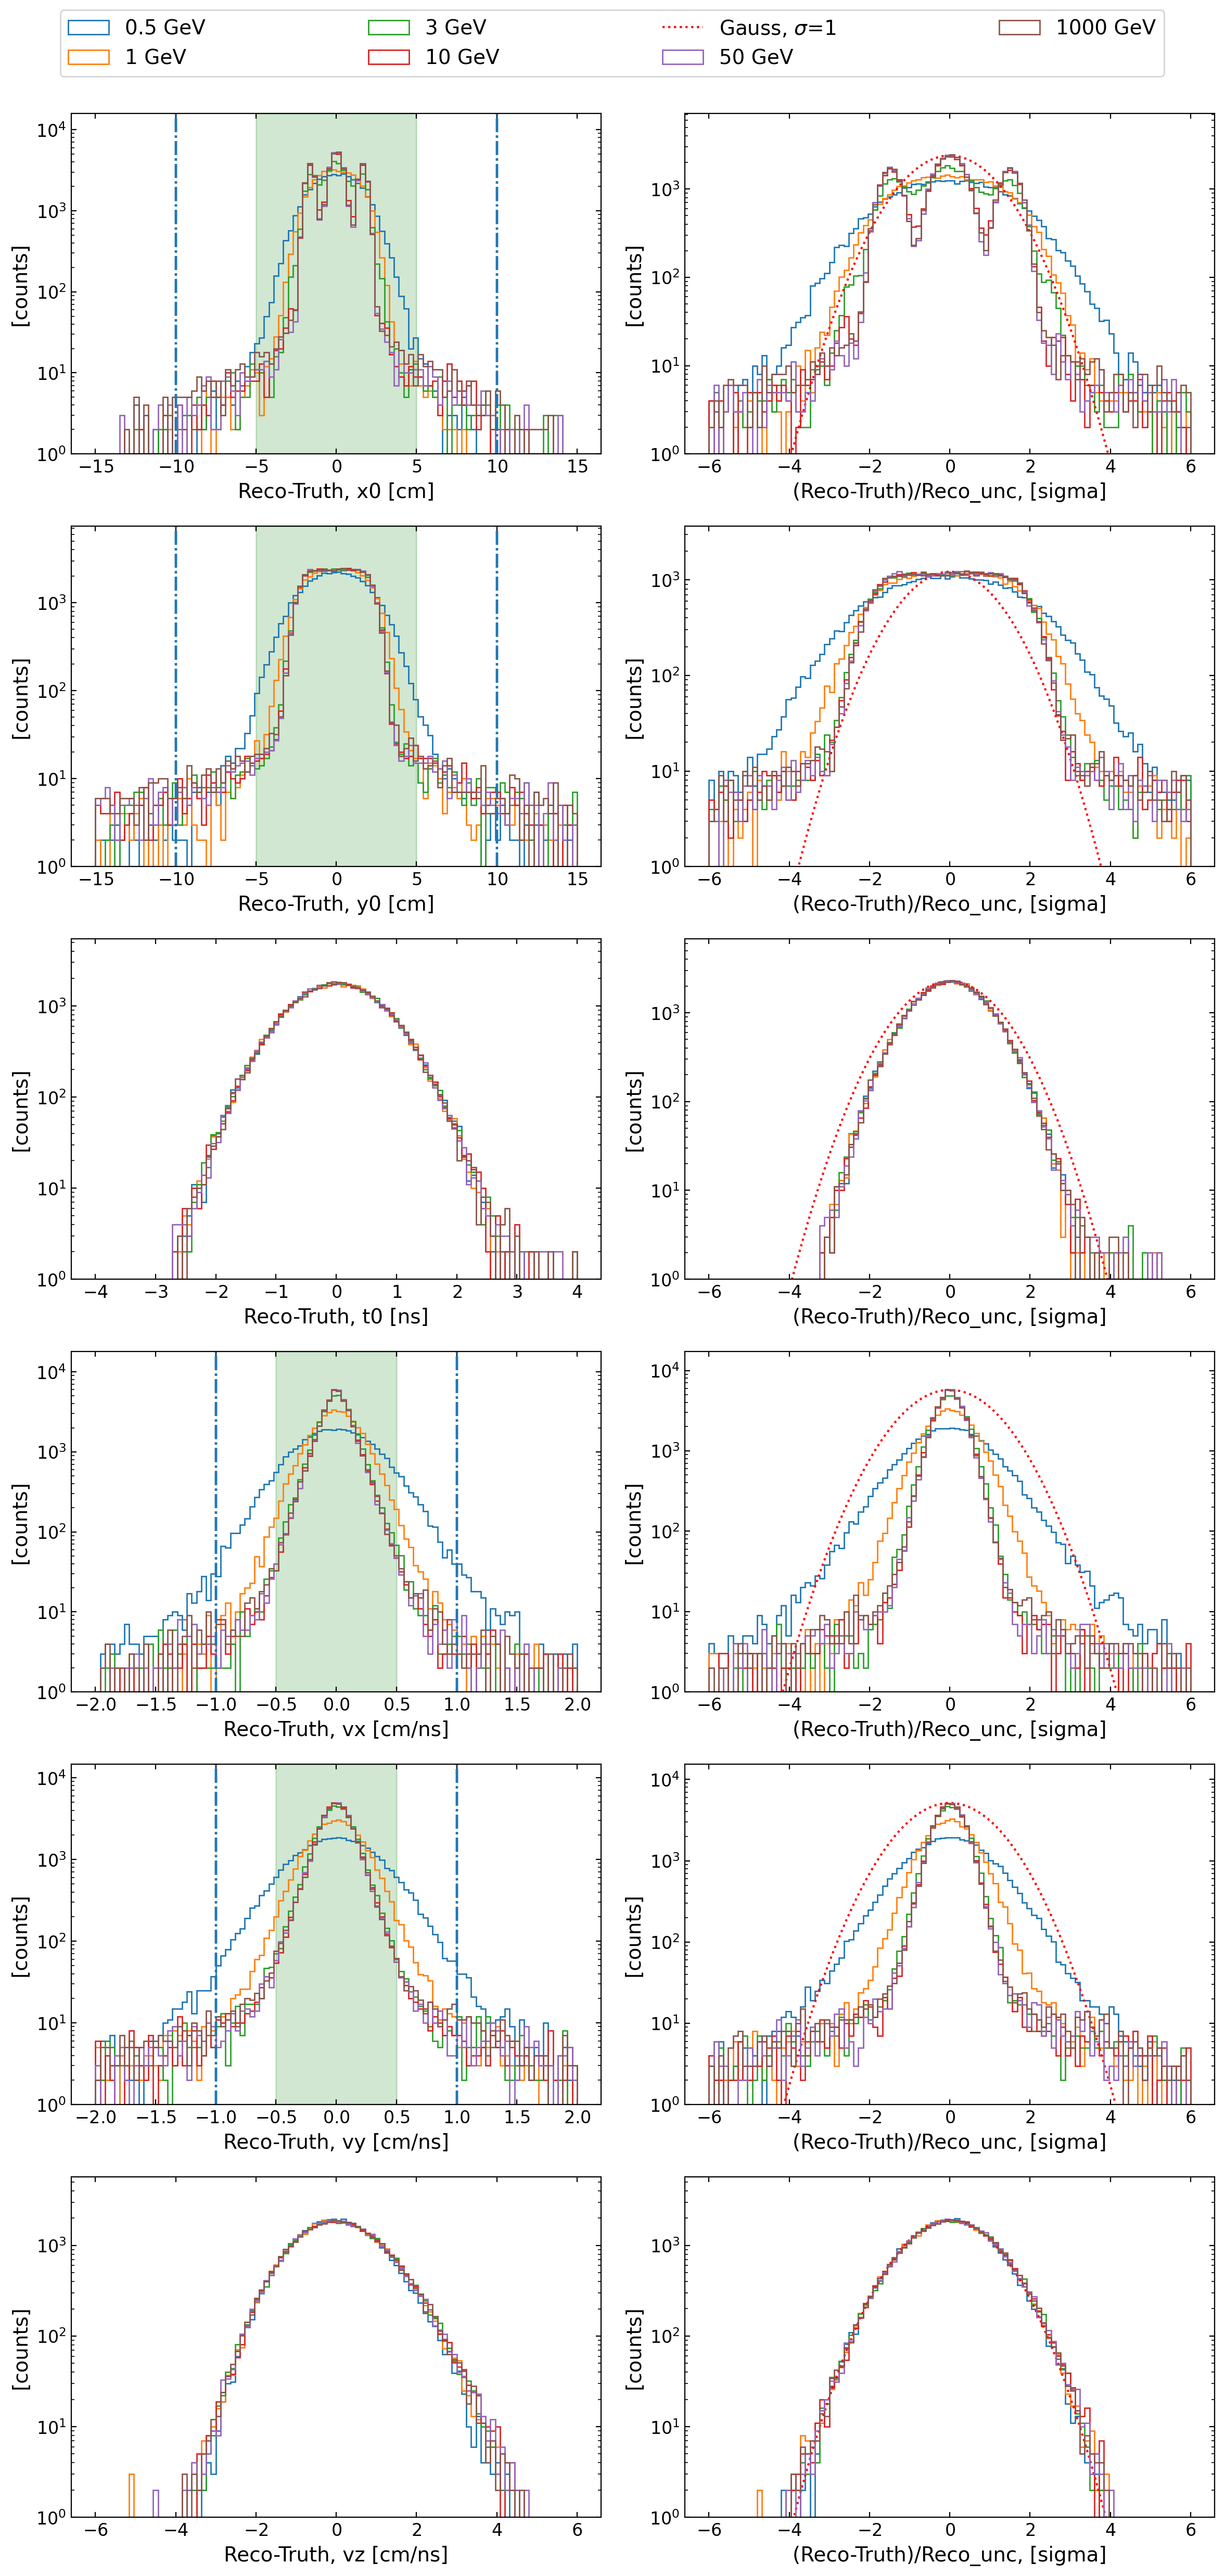

 FCN=302.575 FROM MIGRAD    STATUS=CONVERGED      53 CALLS          54 TOTAL
                     EDM=1.68636e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.01502e+03   1.82119e+01   1.28908e-01   8.64632e-06
   2  Mean         4.32636e-03   7.89942e-03   6.72033e-05   4.25512e-03
   3  Sigma        1.57173e+00   5.26713e-03   7.72830e-06  -3.39206e-02
 FCN=374.551 FROM MIGRAD    STATUS=CONVERGED      55 CALLS          56 TOTAL
                     EDM=2.39546e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.36727e+03   1.43301e+01   1.12849e-01   2.87305e-05
   2  Mean        -1.24104e-02   1.00361e-02   9.49681e-05  -1.91691e-03
   3  Sigma        1.99219e+00   

In [21]:
track_parameters={}
efficiencies_raw={}
efficiencies_abs={}
efficiencies_abs_loose={}

efficiencies_reconstructible={}
efficiencies_4hits={}
efficiencies_cut={}


fig,axs=plt.subplots(6,2,figsize=(12,24))
for energy in energy_list:

    res = results[energy]
    mask_recon_success=res["mask_recon_success"]
    mask_recon_able = (res["truth_nlayer"]>5)& (res["truth_nlayer"]<=9) # layer 3 is the bottom layer, 9 is the top
    # mask_identified = (res["ndigi_track"]==(res["truth_nlayer"]-2)) # The track needs to have same number of hits as truth
    # for i in range(len(mask_identified)):
    #     if np.any(res["ndigi_inds"][i] != np.arange(0, res["ndigi_track"][i])):
    #         mask_identified[i] = False
    mask_identified= np.ones(len(res["ndigi_track"]),dtype=bool)
    for i in range(len(mask_identified)):
        for j in res["ndigi_inds"][i]:
            if j not in np.arange(0, res["ndigi_track"][i]):
                mask_identified[i] = False
                break            
    
    mask_recon_able_subset = (mask_recon_able&mask_identified)[mask_recon_success]
    recon     =np.array(res["recon_ls"])[mask_recon_success]
    recon_unc =np.array(res["recon_ls_unc"])[mask_recon_success]
    truth     =np.array(res["truth"])[mask_recon_success]
    
    n_events = len(mask_recon_success)
    n_success = np.sum(mask_recon_success)
    
    axlabels=["x0 [cm]","y0 [cm]", "t0 [ns]", "vx [cm/ns]", "vy [cm/ns]", "vz [cm/ns]"]
    ranges=[[-15,15],[-15,15],[-4,4],[-2,2], [-2,2], [-6,6]]
    ind=[0,1,3,4,5,6]
    # fit_ranges=[[-0.3,0.3],
    #             [-0.3,0.3],
    #             [-3,3]]
    # fit_bins=[10,10,100]
    
    track_parameters[energy]=[]
    
    mask_3sigma = np.ones(len(recon),dtype=bool)
    
    for i in range(6):
        diff = recon[:,ind[i]]-truth[:,ind[i]]
        n,ibins,p = axs[i][0].hist(diff,bins=100,range=ranges[i],histtype="step",label=f"{energy} GeV");
        bincenters=0.5*(ibins[1:]+ibins[:-1])
        yerr=np.sqrt(n)
        yerr[yerr==0]=1
        popt,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus")
        perr = np.sqrt(np.diag(pcov))
        fw = util.Utils.fwhm(bincenters, n)
        fwhm = fw[1]-fw[0] 
        # print(popt[2], fwhm)
        
        track_parameters[energy].append([popt[2],fwhm])
        mask_temp = np.abs(diff)<fwhm*2
        mask_3sigma = mask_3sigma&mask_temp
        # print(sum(mask_3sigma)/len(mask_3sigma))
        
        axs[i][0].set_ylim(bottom=1,top=max(n)*3)
        axs[i][0].set_xlabel(f"Reco-Truth, {axlabels[i]}")
        axs[i][0].set_ylabel("[counts]")
        axs[i][0].set_yscale("log")
        axs[i][0].grid()

        recon_pull = util.pull(recon[:,ind[i]],truth[:,ind[i]], np.sqrt(recon_unc[:, ind[i]]))      
        n2,ibins2,p = axs[i][1].hist(recon_pull,bins=100,range=(-6,6),histtype="step",label=f"{energy} GeV");
        axs[i][1].set_xlabel(f"(Reco-Truth)/Reco_unc, [sigma]")
        axs[i][1].set_ylabel("[counts]")
        axs[i][1].set_yscale("log")
        # axs[i][1].grid()
        
        # Plot N(0,1) for reference in pull distribution
        if energy==10:
            bincenters=0.5*(ibins2[1:]+ibins2[:-1])
            y = util.Utils.Gauss(bincenters, max(n2),0,1)
            axs[i][1].plot(bincenters,y,color="r",label=r"Gauss, $\sigma$=1",linestyle=":")
            axs[i][1].set_ylim(bottom=1,top=max(n2)*3)
        # if i==5:
        #     axs[i][1].legend(loc=(1.1,0)) 
        
    # Make a fixed range cut for tight and looser track
    diffx = recon[:,0]-truth[:,0]
    diffy = recon[:,1]-truth[:,1]
    diffvx = recon[:,4]-truth[:,4]
    diffvy = recon[:,5]-truth[:,5]
    axs[0][0].axvspan(-5,5,alpha=0.03,color="green")
    axs[1][0].axvspan(-5,5,alpha=0.03,color="green")
    axs[3][0].axvspan(-0.5,0.5,alpha=0.03,color="green")
    axs[4][0].axvspan(-0.5,0.5,alpha=0.03,color="green")   
    axs[0][0].axvline(-10,linestyle="-.")
    axs[1][0].axvline(-10,linestyle="-.")
    axs[3][0].axvline(-1,linestyle="-.")
    axs[4][0].axvline(-1,linestyle="-.")  
    axs[0][0].axvline(10,linestyle="-.")
    axs[1][0].axvline(10,linestyle="-.")
    axs[3][0].axvline(1,linestyle="-.")
    axs[4][0].axvline(1,linestyle="-.")      
    mask_TIGHT  = (np.abs(diffx)<5) & (np.abs(diffy)<5) & (np.abs(diffvx)<0.5) & (np.abs(diffvy)<0.5)
    mask_LOOSER = (np.abs(diffx)<10) & (np.abs(diffy)<10) & (np.abs(diffvx)<1) & (np.abs(diffvy)<1)
            
            
    efficiencies_raw[energy]=list(rt.BayesDivide([sum(mask_recon_success)],[len(mask_recon_success)]))
    efficiencies_abs[energy]=list(rt.BayesDivide([sum(mask_TIGHT)],[len(mask_recon_success)]))
    efficiencies_abs_loose[energy]=list(rt.BayesDivide([sum(mask_LOOSER)],[len(mask_recon_success)]))

    efficiencies_reconstructible[energy] = list(rt.BayesDivide([sum(mask_recon_able)],[len(mask_recon_success)]))
    efficiencies_4hits[energy]=list(rt.BayesDivide([sum(mask_identified&mask_recon_able)],[sum(mask_recon_able)]))
    efficiencies_cut[energy] =list(rt.BayesDivide([sum(mask_LOOSER&mask_recon_able_subset)],[sum(mask_identified&mask_recon_able)]))   
    
# legend_top_figure(ncol=4,)
handles, labels = axs[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left',ncol=4,mode="expand", bbox_to_anchor=(0.05,1.002, 0.9,0.03))
tight_layout()

savefig("all_muon")
plt.show()

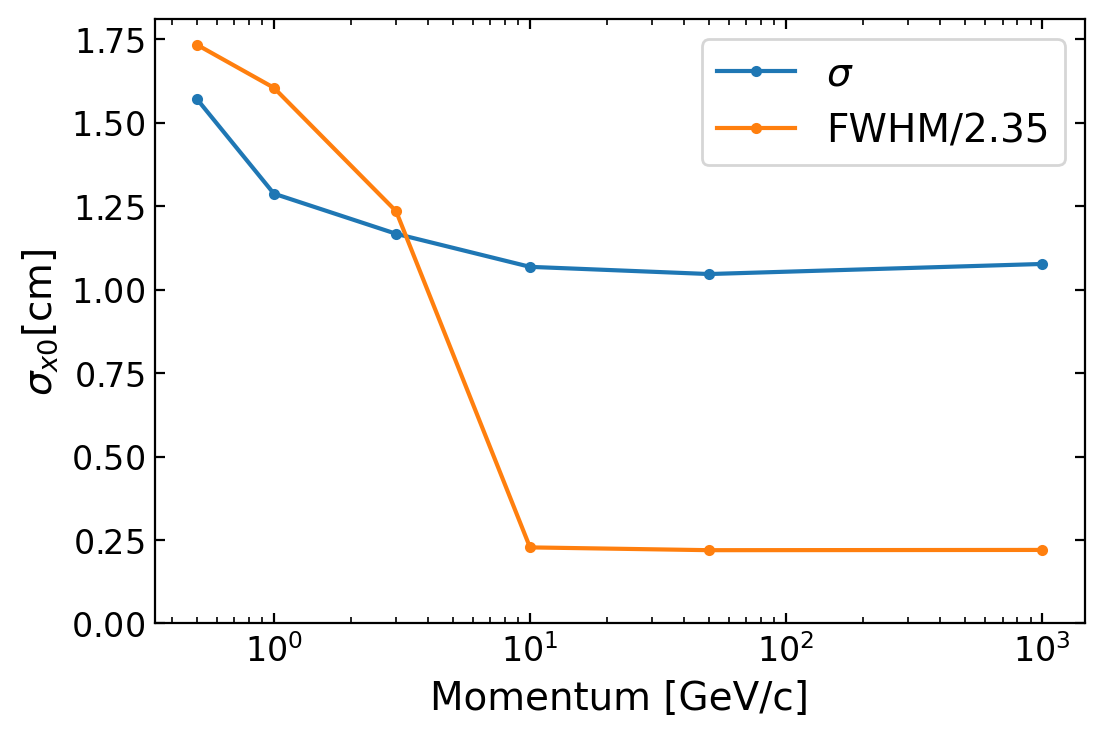

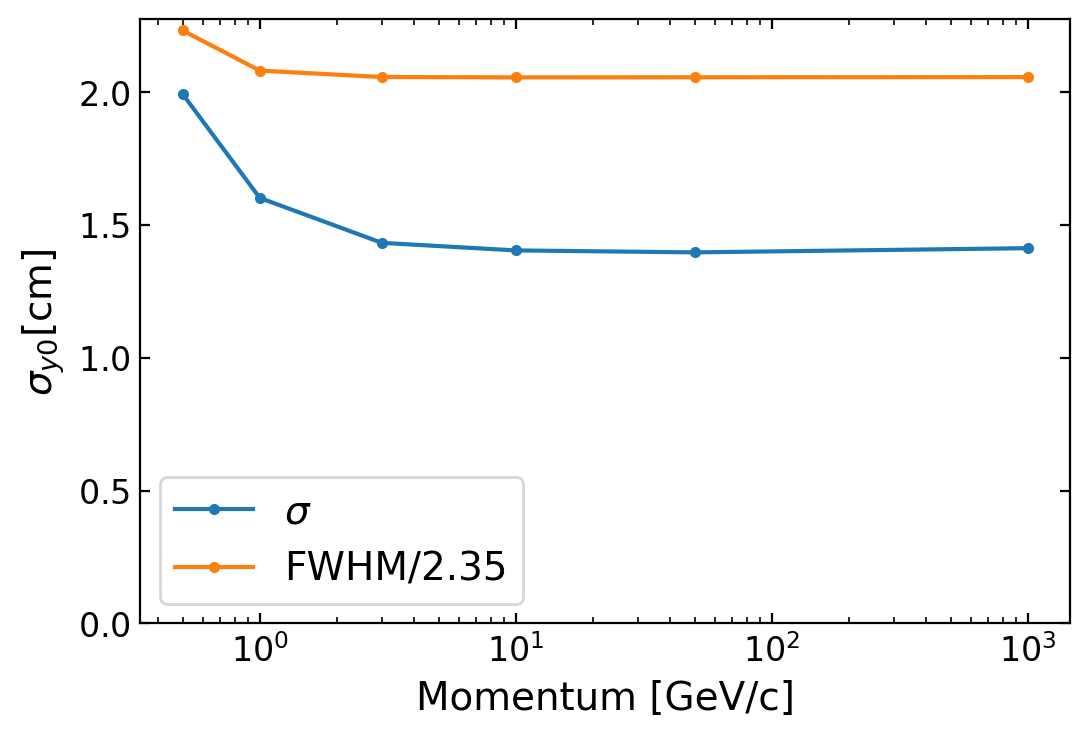

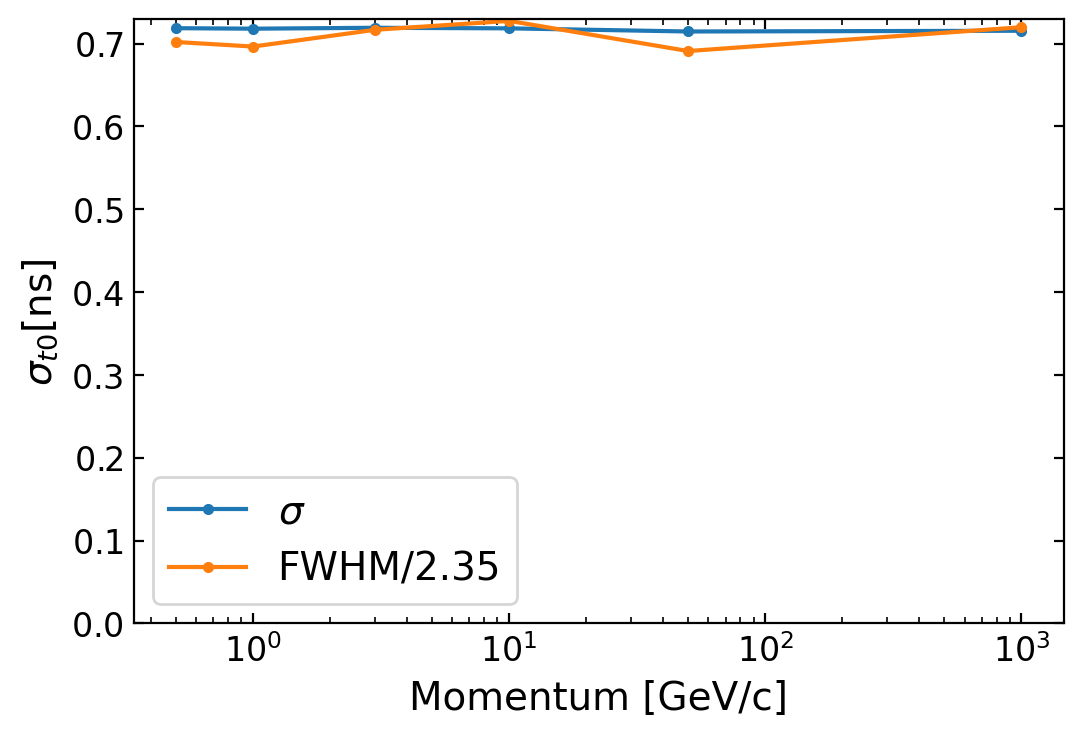

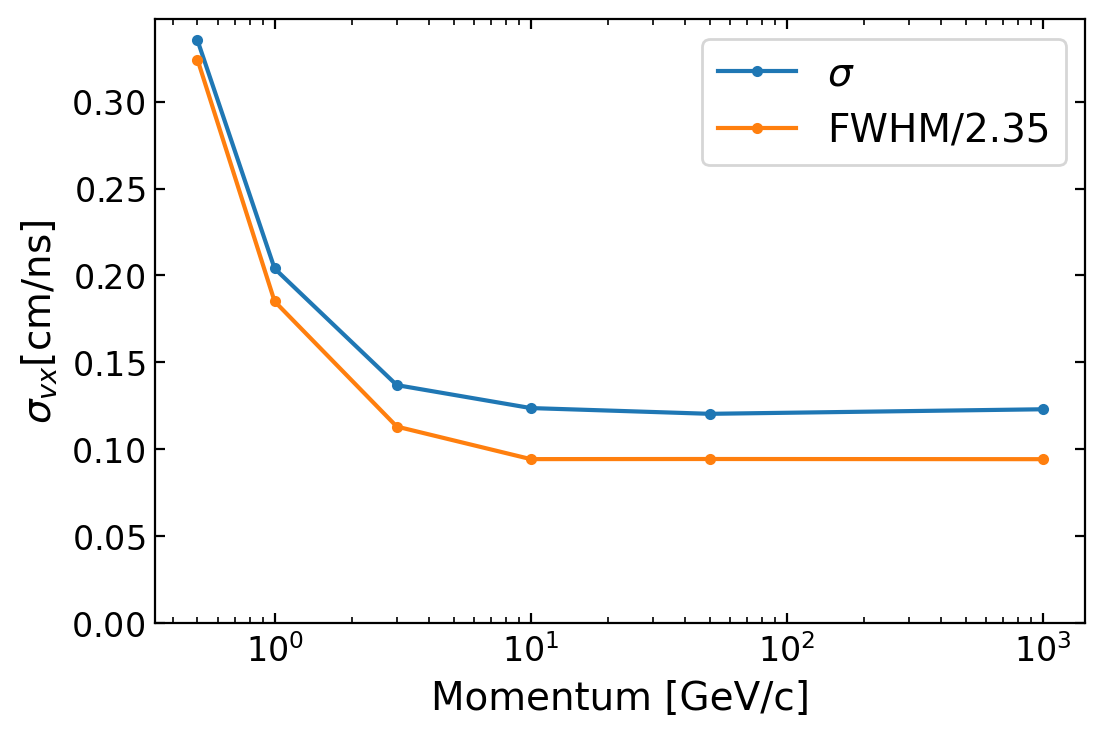

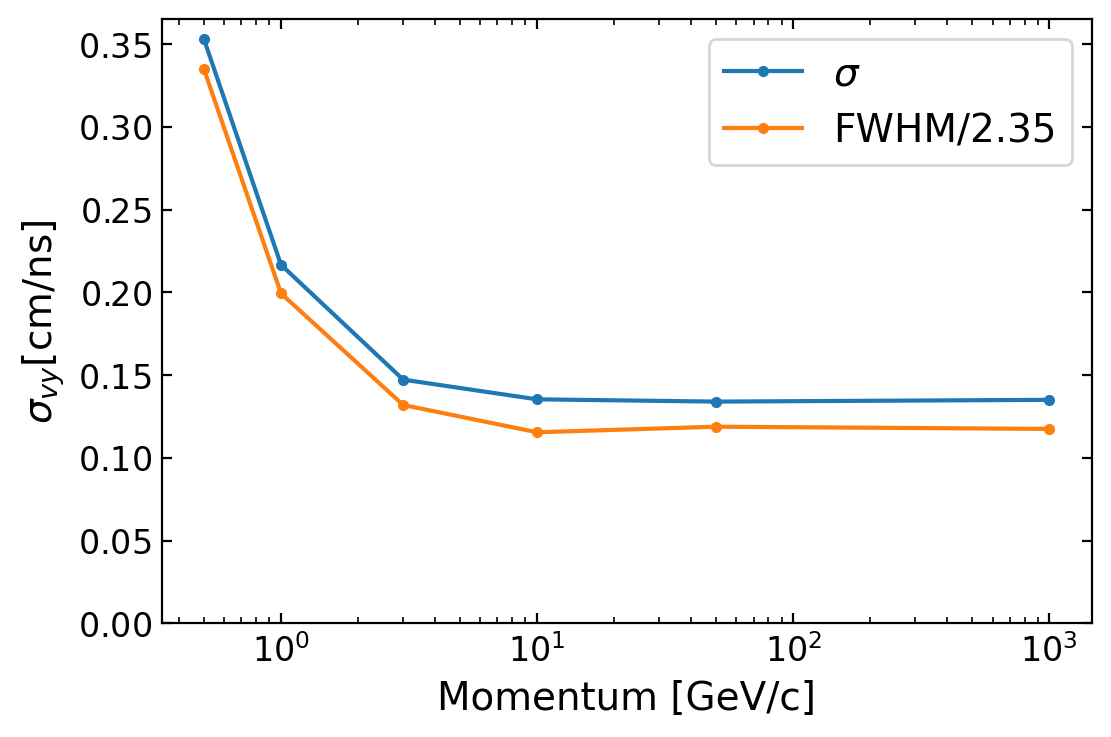

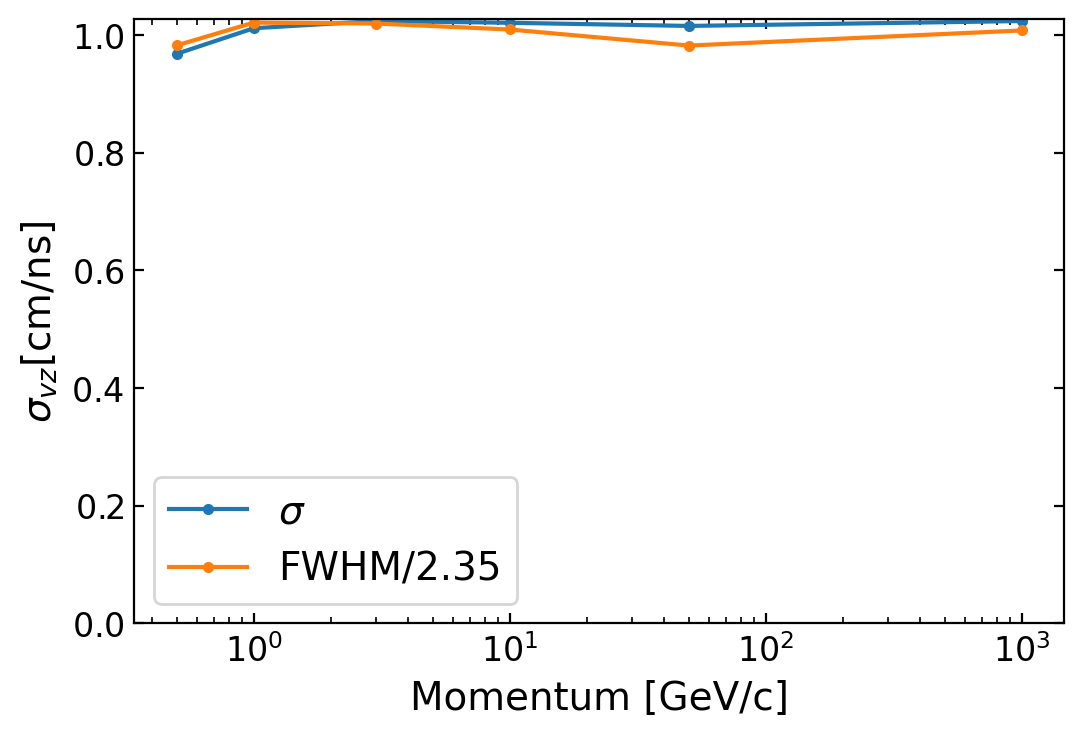

In [22]:
axlabels=["x0 [cm]","y0 [cm]", "t0 [ns]", "vx [cm/ns]", "vy [cm/ns]", "vz [cm/ns]"]
plot_data=[]
plot_data_res=[]
for ipar in range(6):
    es=[]
    sigmas = []
    fwhms=[]
    for e in track_parameters:
        res = track_parameters[e]
        es.append(e)
        sigmas.append(res[ipar][0])
        fwhms.append(res[ipar][1]/2.355)
    plot(es, sigmas,color="C0",label=r"$\sigma$",marker=".")
    plot(es, fwhms,color="C1",label="FWHM/2.35",marker=".")        
    axname = axlabels[ipar].split(" ")[0]
    t = "$\sigma_{"+ f"{axname}" + "}$" + axlabels[ipar].split(" ")[1]
    ylabel(fr"{t}")
    xlabel("Momentum [GeV/c]")
    legend()
    xscale('log')
    ylim(bottom=0)
    show()
    
    plot_data_res.append([es,sigmas,fwhms])
    

['/project/def-mdiamond/tomren/mathusla/data/fit_study/plot_data_muon_singletrack_LS.jojblib']

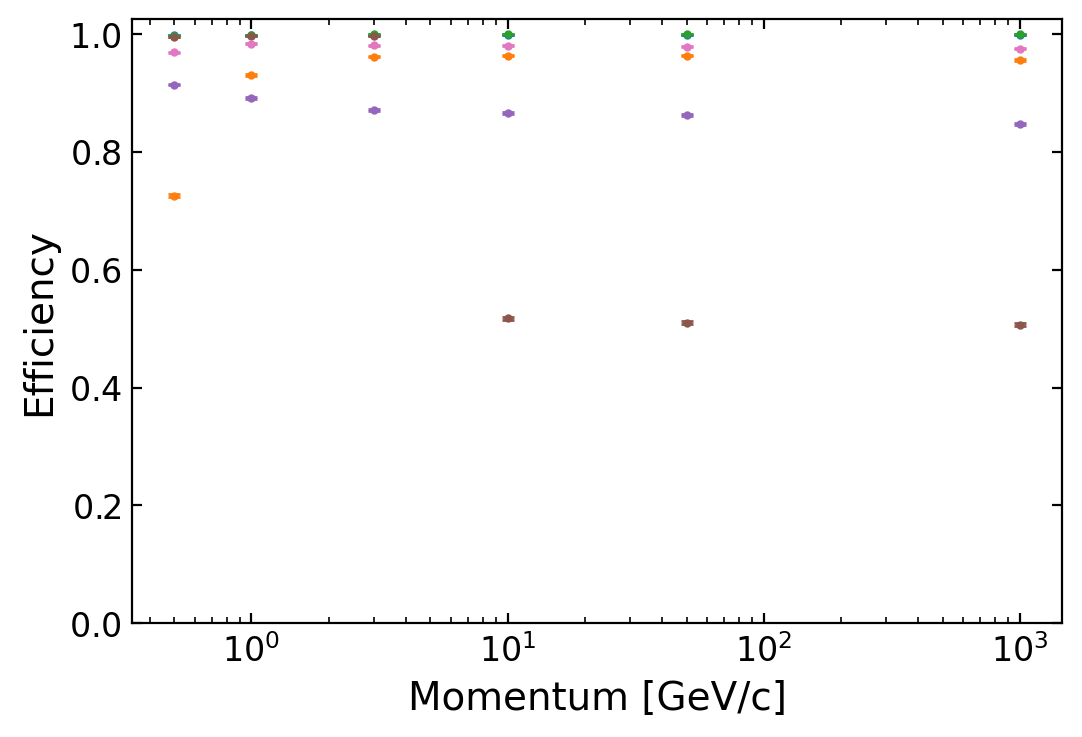

In [23]:
es=[]
effs1=[]
effs1_err_l=[]
effs1_err_h=[]
effs2=[]
effs2_err_l=[]
effs2_err_h=[]
effs3=[]
effs3_err_l=[]
effs3_err_h=[]
effs4=[]
effs4_err_l=[]
effs4_err_h=[]
effs5=[]
effs5_err_l=[]
effs5_err_h=[]
effs6=[]
effs6_err_l=[]
effs6_err_h=[]

for e in efficiencies_raw:
    es.append(e)
    
    eff = efficiencies_raw[e]
    effs1.append(eff[0][0])
    effs1_err_l.append(eff[1][0])
    effs1_err_h.append(eff[2][0])
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C0",markersize=2,capsize=2)
    
    eff = efficiencies_abs[e]
    effs2.append(eff[0][0])
    effs2_err_l.append(eff[1][0])
    effs2_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C1",markersize=2,capsize=2)
    
    eff = efficiencies_reconstructible[e]
    effs3.append(eff[0][0])
    effs3_err_l.append(eff[1][0])
    effs3_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C2",markersize=2,capsize=2,label="e_recon-able") 
    
    eff = efficiencies_4hits[e]
    effs4.append(eff[0][0])
    effs4_err_l.append(eff[1][0])
    effs4_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C4",markersize=2,capsize=2,label="e_recog")   
    
    eff = efficiencies_cut[e]
    effs5.append(eff[0][0])
    effs5_err_l.append(eff[1][0])
    effs5_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C5",markersize=2,capsize=2,label="e_param")     
    
    
    eff = efficiencies_abs_loose[e]
    effs6.append(eff[0][0])
    effs6_err_l.append(eff[1][0])
    effs6_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C6",markersize=2,capsize=2,label="e_param")         
    
plot_data_eff = [es, 
                 [effs1,effs1_err_l,effs1_err_h],  
                 [effs2,effs2_err_l,effs2_err_h],  
                 [effs3,effs3_err_l,effs3_err_h],
                 [effs4,effs4_err_l,effs4_err_h],
                 [effs5,effs5_err_l,effs5_err_h],
                 [effs6,effs6_err_l,effs6_err_h]]

plot_data = [plot_data_res,plot_data_eff]
    
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
xscale("log")
ylim(bottom=0)
# legend()

joblib.dump(plot_data,f"{DATA_DIR}/plot_data_muon_singletrack_LS.jojblib")

---
## Pion


In [24]:
# --- Load all muon results

energy_list = [0.5, 1, 3, 10]
results = {}
for energy in energy_list:
    files=glob.glob(f"{DATA_DIR}/pion_{energy}_GeV/*/*/ls_fit.joblib",)
    #files=util.Utils.sortByExt(files)
    if len(files)>=1:
        results[energy] = joblib.load(files[0])
        print(files[0])
    if len(files)>1:
        print(f"More than one file for {energy} GeV")

/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_0.5_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_1_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_3_GeV/20230411/185206/ls_fit.joblib
/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_10_GeV/20230412/175710/ls_fit.joblib


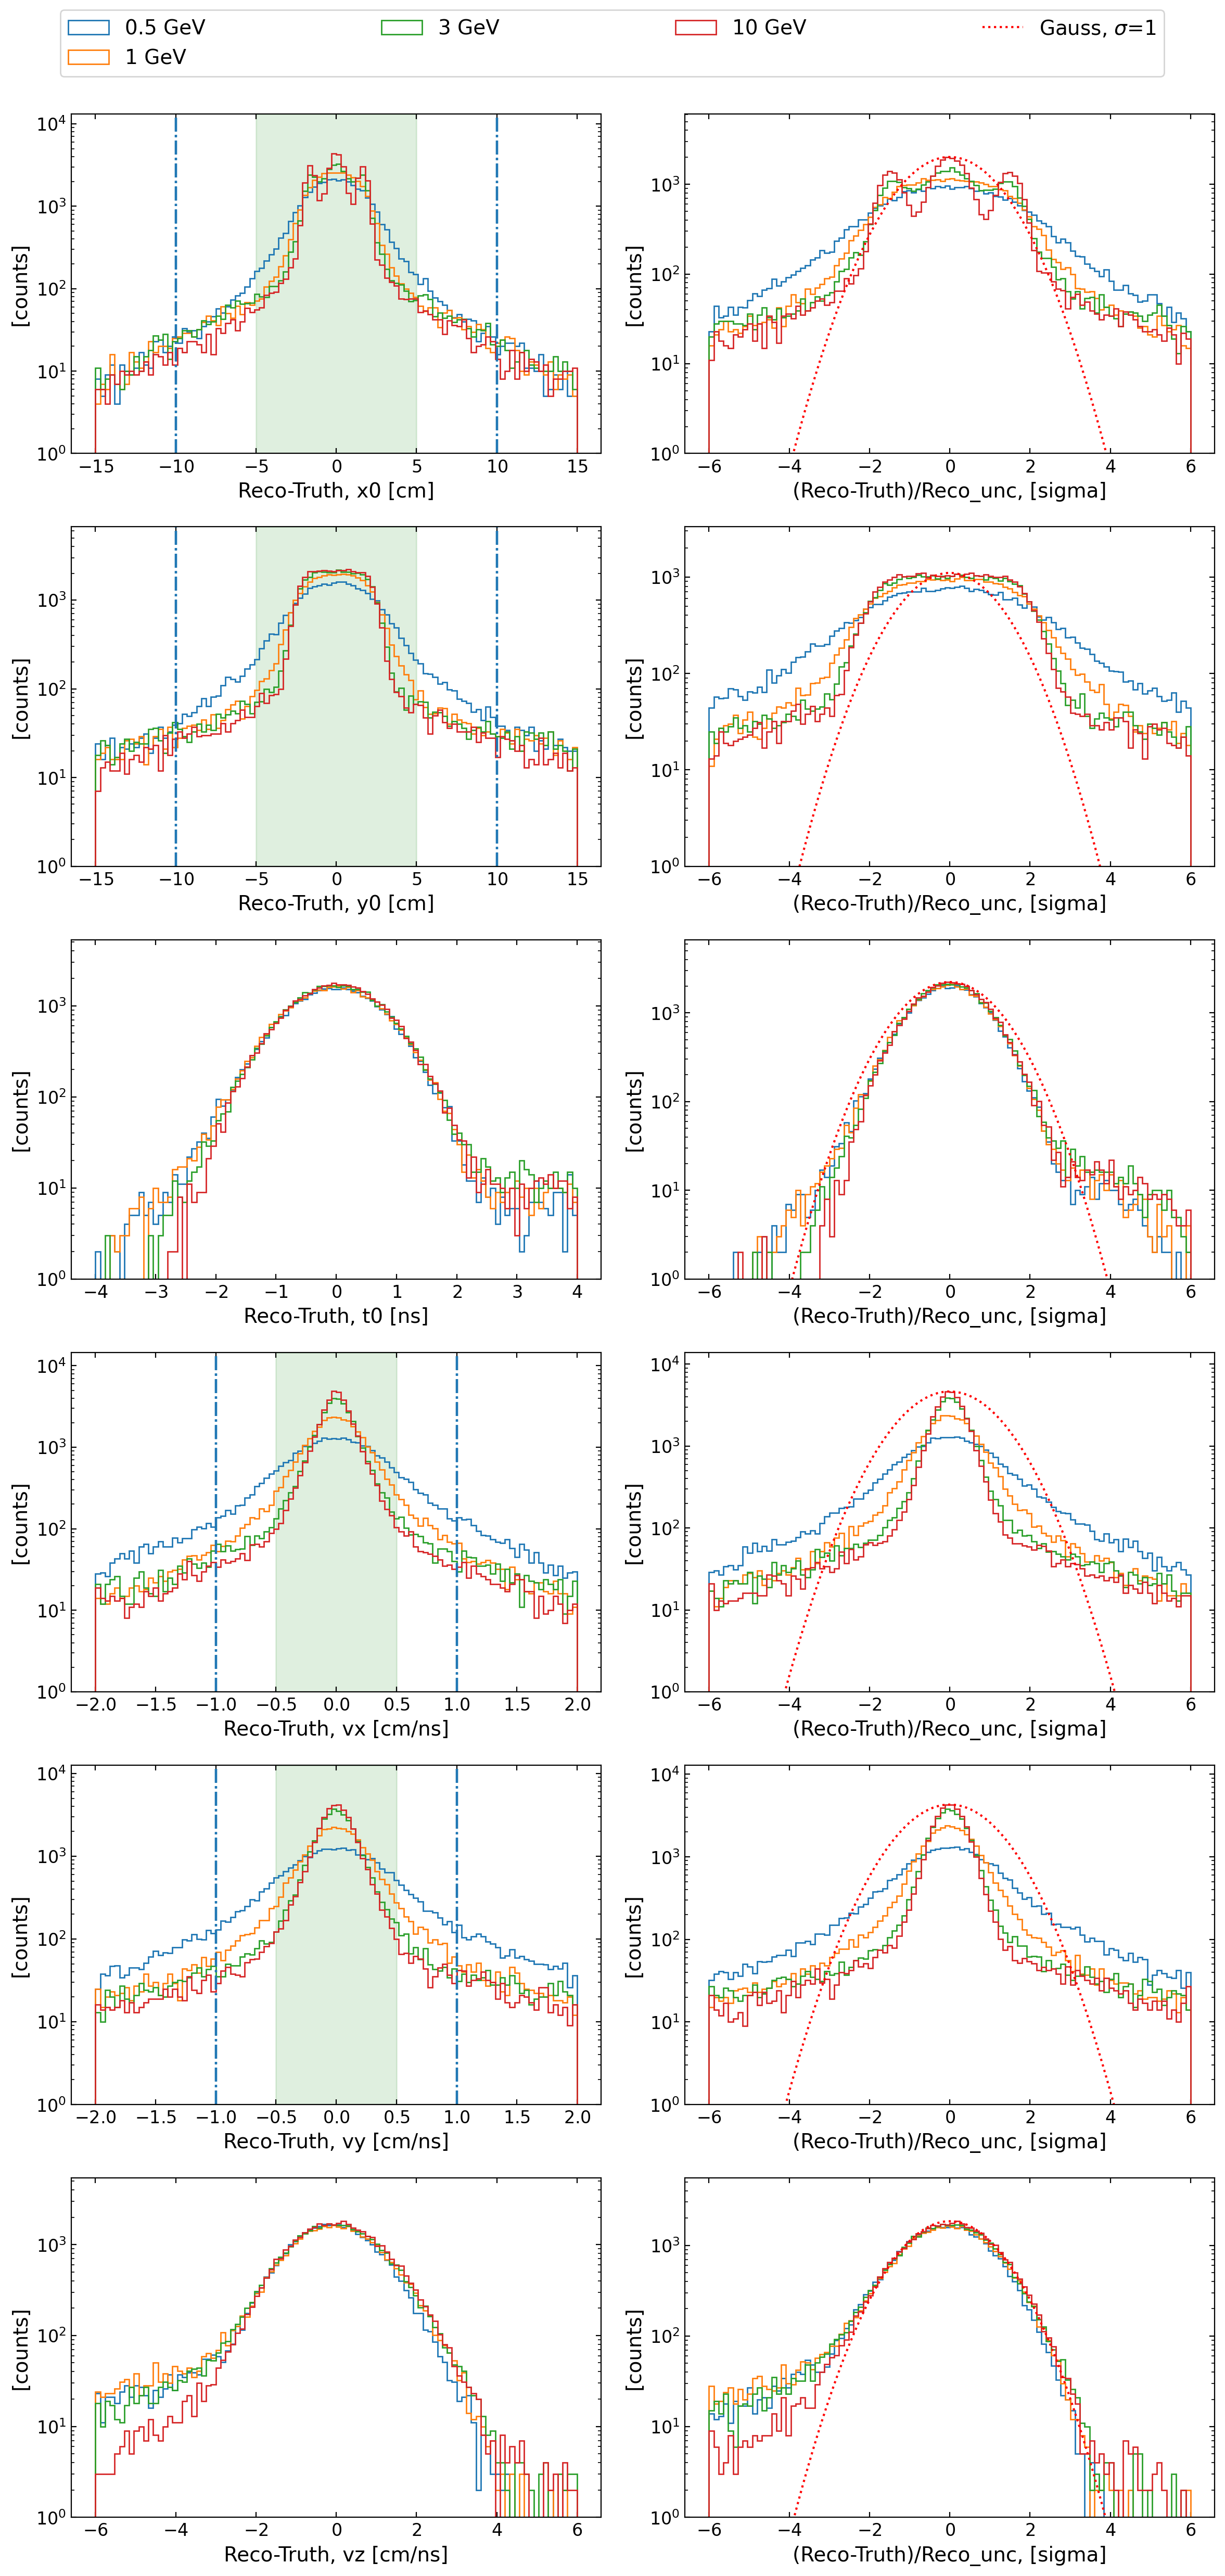

 FCN=1937.03 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=8.46112e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.02573e+03   1.50919e+01   2.34913e-01   1.73747e-05
   2  Mean        -1.28397e-02   1.09535e-02   2.35414e-04   1.02407e-02
   3  Sigma        2.03015e+00   1.04284e-02   2.25546e-05  -1.13510e-01
 FCN=2177.93 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=8.58202e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.49175e+03   1.15524e+01   1.86960e-01   7.22267e-06
   2  Mean        -4.73422e-03   1.45941e-02   3.32615e-04   7.63233e-03
   3  Sigma        2.65392e+00   

In [28]:
track_parameters={}
efficiencies_raw={}
efficiencies_abs={}
efficiencies_abs_loose={}

efficiencies_reconstructible={}
efficiencies_4hits={}
efficiencies_cut={}


fig,axs=plt.subplots(6,2,figsize=(12,24))
for energy in energy_list:

    res = results[energy]
    mask_recon_success=res["mask_recon_success"]
    mask_recon_able = (res["truth_nlayer"]>5)& (res["truth_nlayer"]<=9) # layer 3 is the bottom layer, 9 is the top
    # mask_identified = (res["ndigi_track"]==(res["truth_nlayer"]-2)) # The track needs to have same number of hits as truth
    # for i in range(len(mask_identified)):
    #     if np.any(res["ndigi_inds"][i] != np.arange(0, res["ndigi_track"][i])):
    #         mask_identified[i] = False
    mask_identified= np.ones(len(res["ndigi_track"]),dtype=bool)
    for i in range(len(mask_identified)):
        for j in res["ndigi_inds"][i]:
            if j not in np.arange(0, res["ndigi_track"][i]):
                mask_identified[i] = False
                break            
    
    mask_recon_able_subset = (mask_recon_able&mask_identified)[mask_recon_success]
    recon     =np.array(res["recon_ls"])[mask_recon_success]
    recon_unc =np.array(res["recon_ls_unc"])[mask_recon_success]
    truth     =np.array(res["truth"])[mask_recon_success]
    
    n_events = len(mask_recon_success)
    n_success = np.sum(mask_recon_success)
    
    axlabels=["x0 [cm]","y0 [cm]", "t0 [ns]", "vx [cm/ns]", "vy [cm/ns]", "vz [cm/ns]"]
    ranges=[[-15,15],[-15,15],[-4,4],[-2,2], [-2,2], [-6,6]]
    ind=[0,1,3,4,5,6]
    # fit_ranges=[[-0.3,0.3],
    #             [-0.3,0.3],
    #             [-3,3]]
    # fit_bins=[10,10,100]
    
    track_parameters[energy]=[]
    
    mask_3sigma = np.ones(len(recon),dtype=bool)
    
    for i in range(6):
        diff = recon[:,ind[i]]-truth[:,ind[i]]
        n,ibins,p = axs[i][0].hist(diff,bins=100,range=ranges[i],histtype="step",label=f"{energy} GeV");
        bincenters=0.5*(ibins[1:]+ibins[:-1])
        yerr=np.sqrt(n)
        yerr[yerr==0]=1
        popt,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus")
        perr = np.sqrt(np.diag(pcov))
        fw = util.Utils.fwhm(bincenters, n)
        fwhm = fw[1]-fw[0] 
        # print(popt[2], fwhm)
        
        track_parameters[energy].append([popt[2],fwhm])
        mask_temp = np.abs(diff)<fwhm*2
        mask_3sigma = mask_3sigma&mask_temp
        # print(sum(mask_3sigma)/len(mask_3sigma))
        
        axs[i][0].set_ylim(bottom=1,top=max(n)*3)
        axs[i][0].set_xlabel(f"Reco-Truth, {axlabels[i]}")
        axs[i][0].set_ylabel("[counts]")
        axs[i][0].set_yscale("log")
        axs[i][0].grid()

        recon_pull = util.pull(recon[:,ind[i]],truth[:,ind[i]], np.sqrt(recon_unc[:, ind[i]]))      
        n2,ibins2,p = axs[i][1].hist(recon_pull,bins=100,range=(-6,6),histtype="step",label=f"{energy} GeV");
        axs[i][1].set_xlabel(f"(Reco-Truth)/Reco_unc, [sigma]")
        axs[i][1].set_ylabel("[counts]")
        axs[i][1].set_yscale("log")
        # axs[i][1].grid()
        
        # Plot N(0,1) for reference in pull distribution
        if energy==10:
            bincenters=0.5*(ibins2[1:]+ibins2[:-1])
            y = util.Utils.Gauss(bincenters, max(n2),0,1)
            axs[i][1].plot(bincenters,y,color="r",label=r"Gauss, $\sigma$=1",linestyle=":")
            axs[i][1].set_ylim(bottom=1,top=max(n2)*3)
        # if i==5:
        #     axs[i][1].legend(loc=(1.1,0)) 
        
    # Make a fixed range cut for tight and looser track
    diffx = recon[:,0]-truth[:,0]
    diffy = recon[:,1]-truth[:,1]
    diffvx = recon[:,4]-truth[:,4]
    diffvy = recon[:,5]-truth[:,5]
    axs[0][0].axvspan(-5,5,alpha=0.03,color="green")
    axs[1][0].axvspan(-5,5,alpha=0.03,color="green")
    axs[3][0].axvspan(-0.5,0.5,alpha=0.03,color="green")
    axs[4][0].axvspan(-0.5,0.5,alpha=0.03,color="green")   
    axs[0][0].axvline(-10,linestyle="-.")
    axs[1][0].axvline(-10,linestyle="-.")
    axs[3][0].axvline(-1,linestyle="-.")
    axs[4][0].axvline(-1,linestyle="-.")  
    axs[0][0].axvline(10,linestyle="-.")
    axs[1][0].axvline(10,linestyle="-.")
    axs[3][0].axvline(1,linestyle="-.")
    axs[4][0].axvline(1,linestyle="-.")      
    mask_TIGHT  = (np.abs(diffx)<5) & (np.abs(diffy)<5) & (np.abs(diffvx)<0.5) & (np.abs(diffvy)<0.5)
    mask_LOOSER = (np.abs(diffx)<10) & (np.abs(diffy)<10) & (np.abs(diffvx)<1) & (np.abs(diffvy)<1)
            
            
    efficiencies_raw[energy]=list(rt.BayesDivide([sum(mask_recon_success)],[len(mask_recon_success)]))
    efficiencies_abs[energy]=list(rt.BayesDivide([sum(mask_TIGHT)],[len(mask_recon_success)]))
    efficiencies_abs_loose[energy]=list(rt.BayesDivide([sum(mask_LOOSER)],[len(mask_recon_success)]))

    efficiencies_reconstructible[energy] = list(rt.BayesDivide([sum(mask_recon_able)],[len(mask_recon_success)]))
    efficiencies_4hits[energy]=list(rt.BayesDivide([sum(mask_identified&mask_recon_able)],[sum(mask_recon_able)]))
    efficiencies_cut[energy] =list(rt.BayesDivide([sum(mask_LOOSER&mask_recon_able_subset)],[sum(mask_identified&mask_recon_able)]))   
    
# legend_top_figure(ncol=4,)
handles, labels = axs[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left',ncol=4,mode="expand", bbox_to_anchor=(0.05,1.002, 0.9,0.03))
tight_layout()

savefig("all_pion")
plt.show()

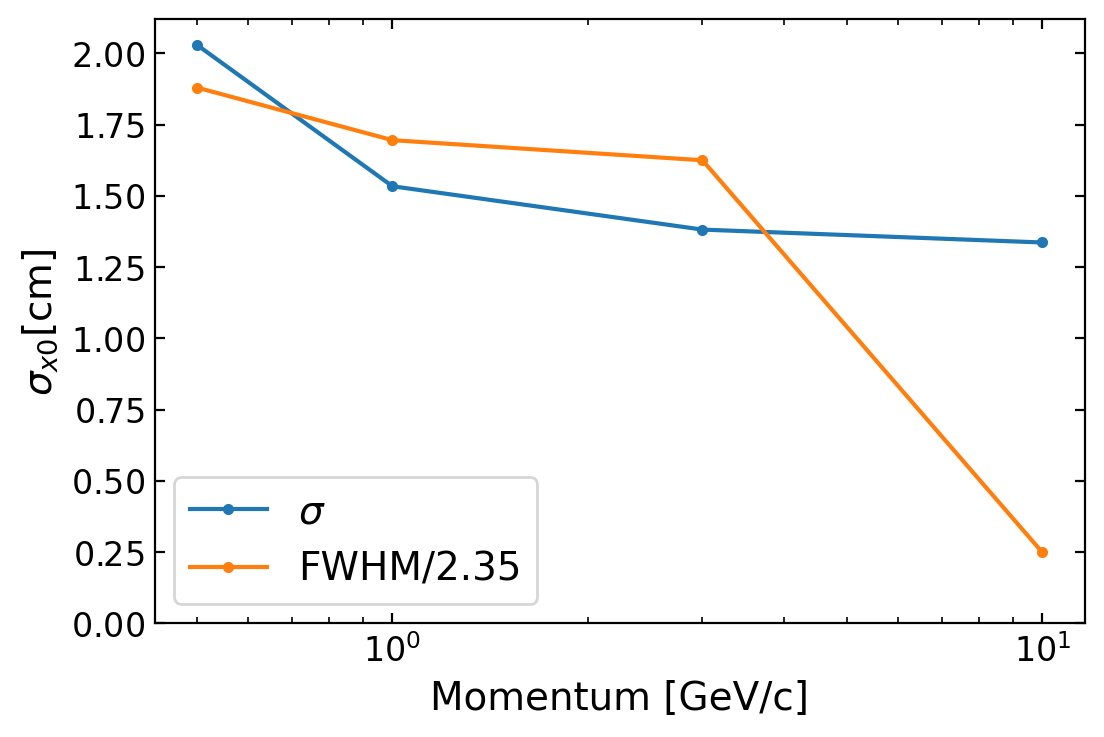

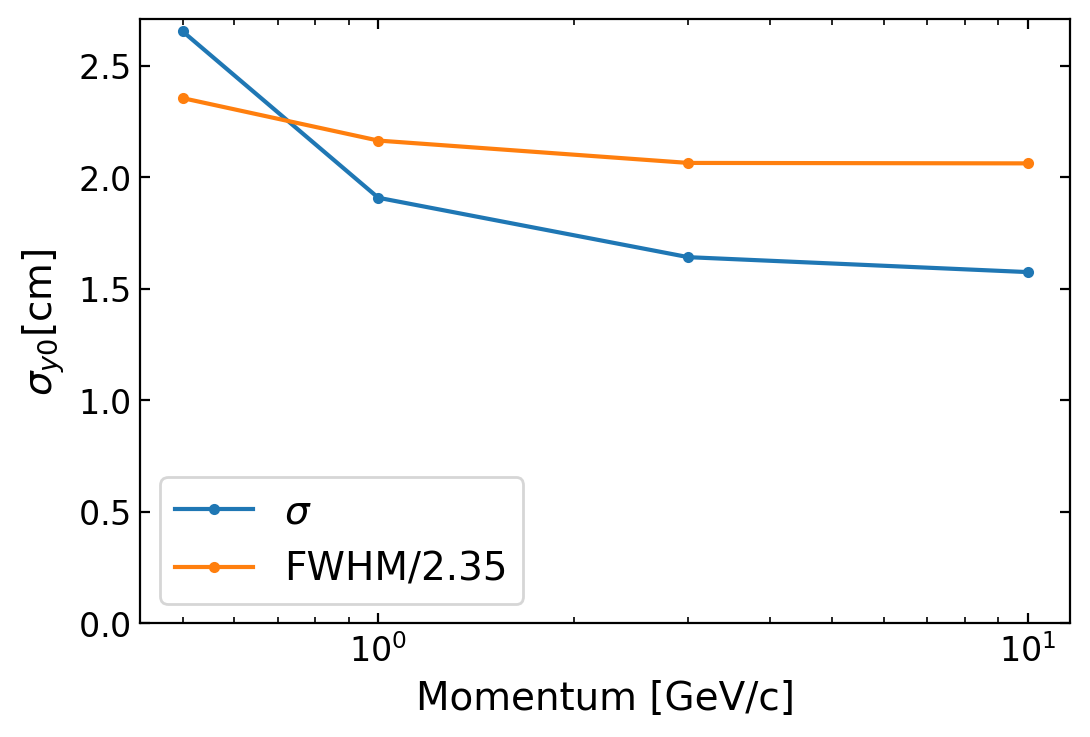

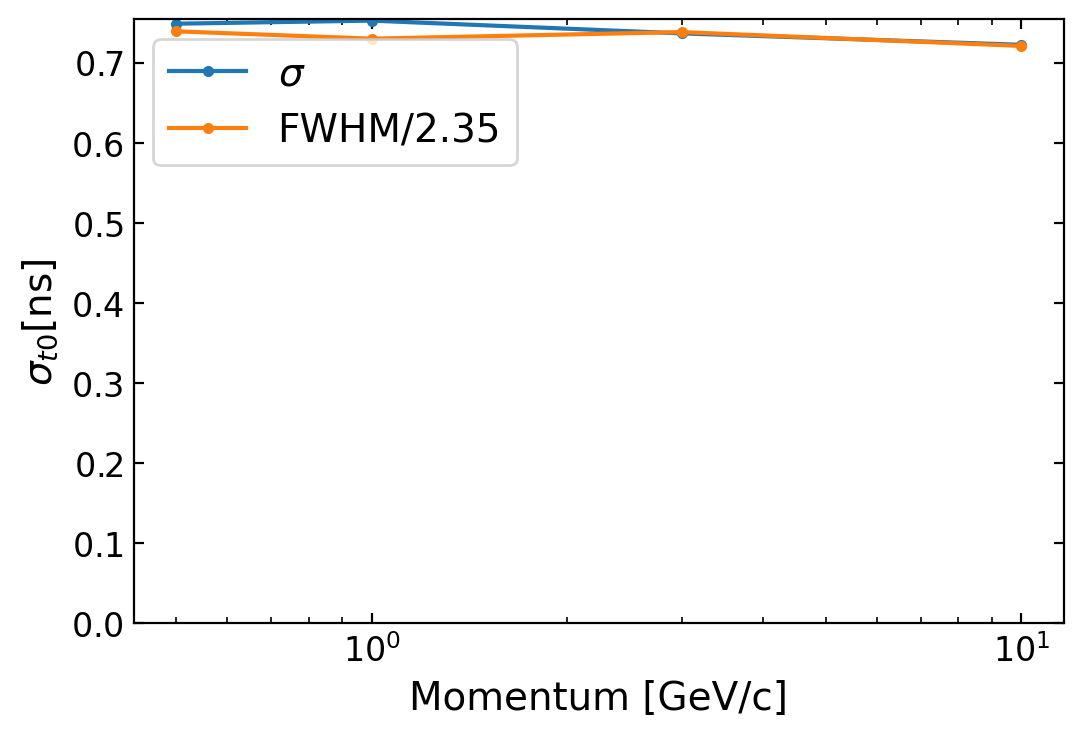

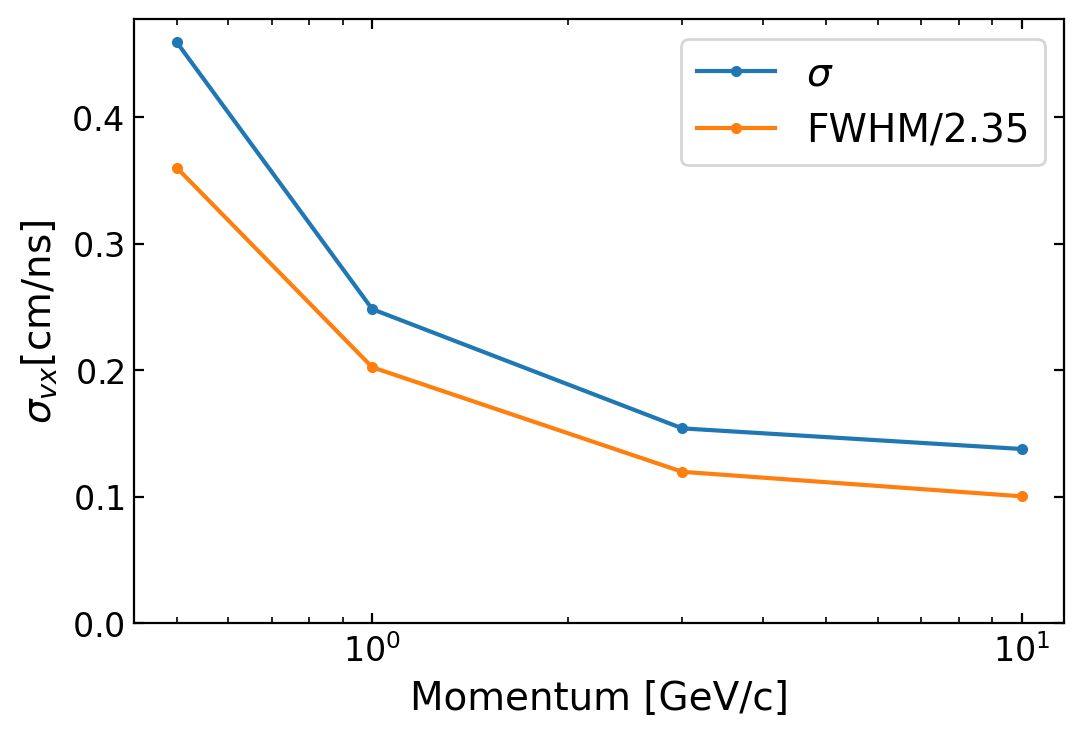

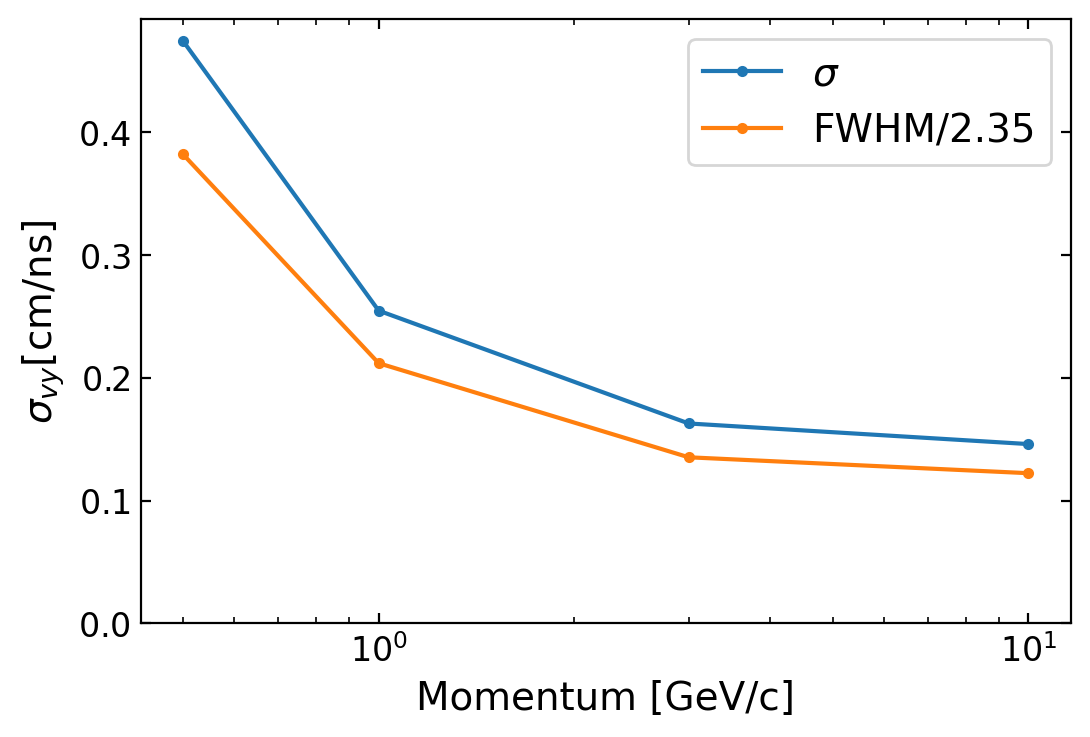

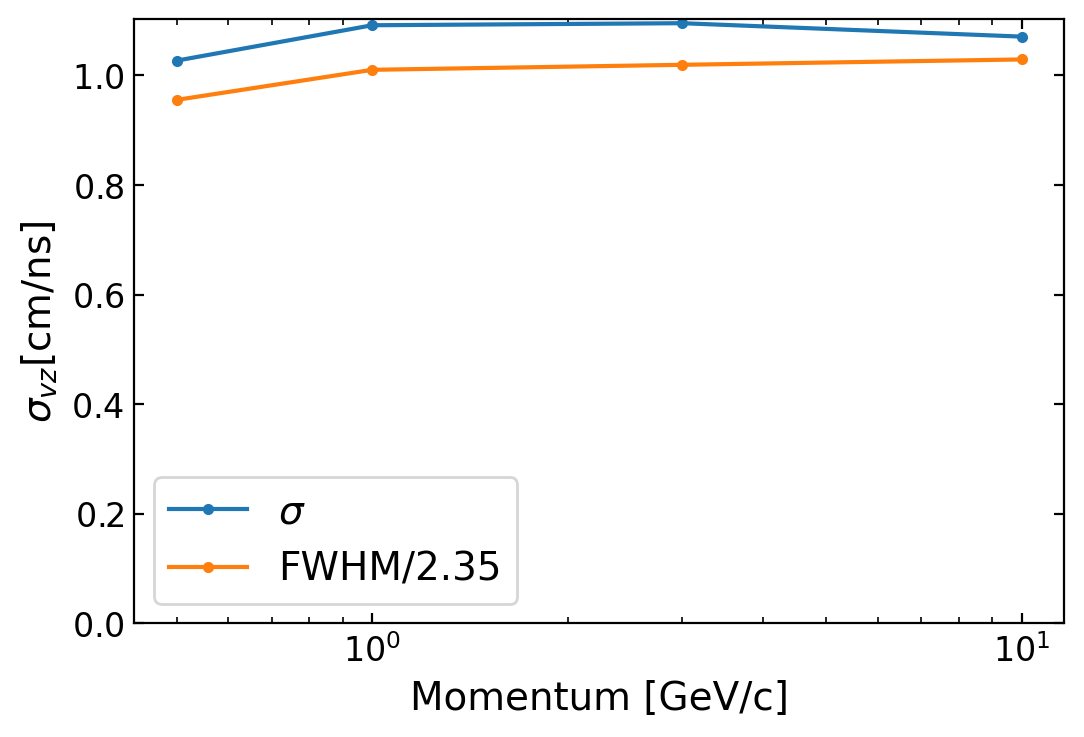

In [29]:
axlabels=["x0 [cm]","y0 [cm]", "t0 [ns]", "vx [cm/ns]", "vy [cm/ns]", "vz [cm/ns]"]
plot_data=[]
plot_data_res=[]
for ipar in range(6):
    es=[]
    sigmas = []
    fwhms=[]
    for e in track_parameters:
        res = track_parameters[e]
        es.append(e)
        sigmas.append(res[ipar][0])
        fwhms.append(res[ipar][1]/2.355)
    plot(es, sigmas,color="C0",label=r"$\sigma$",marker=".")
    plot(es, fwhms,color="C1",label="FWHM/2.35",marker=".")        
    axname = axlabels[ipar].split(" ")[0]
    t = "$\sigma_{"+ f"{axname}" + "}$" + axlabels[ipar].split(" ")[1]
    ylabel(fr"{t}")
    xlabel("Momentum [GeV/c]")
    legend()
    xscale('log')
    ylim(bottom=0)
    show()
    
    plot_data_res.append([es,sigmas,fwhms])
    

['/project/def-mdiamond/tomren/mathusla/data/fit_study/plot_data_pion_singletrack_LS.jojblib']

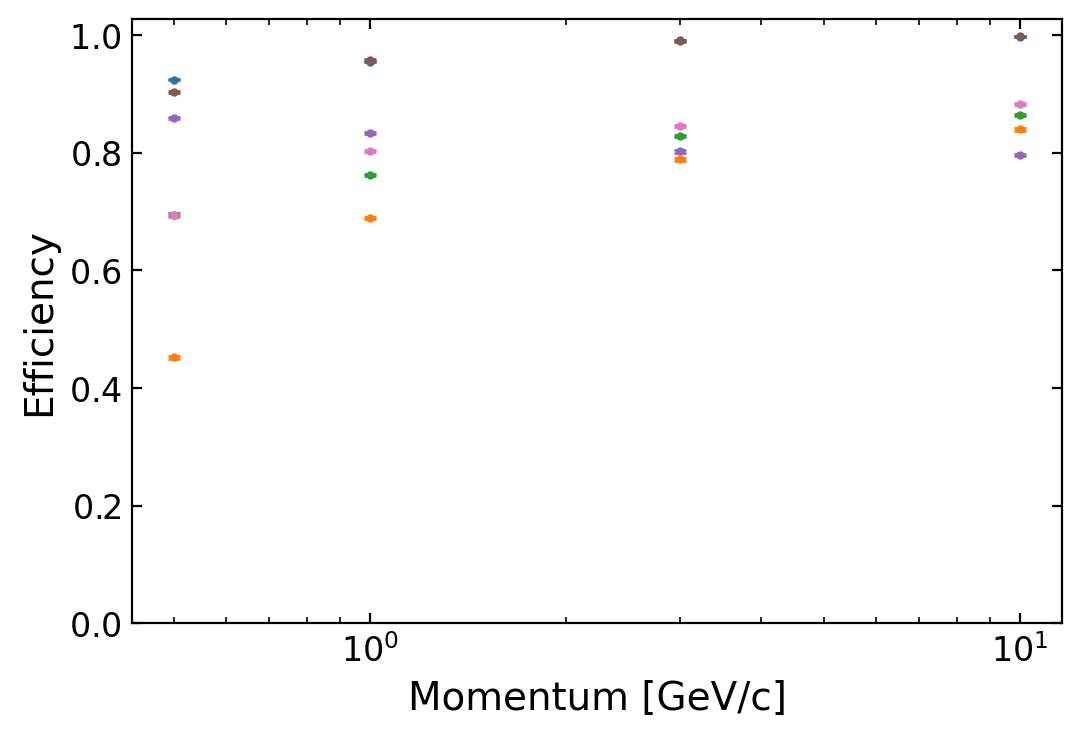

In [30]:
es=[]
effs1=[]
effs1_err_l=[]
effs1_err_h=[]
effs2=[]
effs2_err_l=[]
effs2_err_h=[]
effs3=[]
effs3_err_l=[]
effs3_err_h=[]
effs4=[]
effs4_err_l=[]
effs4_err_h=[]
effs5=[]
effs5_err_l=[]
effs5_err_h=[]
effs6=[]
effs6_err_l=[]
effs6_err_h=[]

for e in efficiencies_raw:
    es.append(e)
    
    eff = efficiencies_raw[e]
    effs1.append(eff[0][0])
    effs1_err_l.append(eff[1][0])
    effs1_err_h.append(eff[2][0])
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C0",markersize=2,capsize=2)
    
    eff = efficiencies_abs[e]
    effs2.append(eff[0][0])
    effs2_err_l.append(eff[1][0])
    effs2_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C1",markersize=2,capsize=2)
    
    eff = efficiencies_reconstructible[e]
    effs3.append(eff[0][0])
    effs3_err_l.append(eff[1][0])
    effs3_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C2",markersize=2,capsize=2,label="e_recon-able") 
    
    eff = efficiencies_4hits[e]
    effs4.append(eff[0][0])
    effs4_err_l.append(eff[1][0])
    effs4_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C4",markersize=2,capsize=2,label="e_recog")   
    
    eff = efficiencies_cut[e]
    effs5.append(eff[0][0])
    effs5_err_l.append(eff[1][0])
    effs5_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C5",markersize=2,capsize=2,label="e_param")     
    
    
    eff = efficiencies_abs_loose[e]
    effs6.append(eff[0][0])
    effs6_err_l.append(eff[1][0])
    effs6_err_h.append(eff[2][0])    
    errorbar(e, eff[0][0], yerr=[eff[1],eff[2]],fmt="o-",color="C6",markersize=2,capsize=2,label="e_param")         
    
plot_data_eff = [es, 
                 [effs1,effs1_err_l,effs1_err_h],  
                 [effs2,effs2_err_l,effs2_err_h],  
                 [effs3,effs3_err_l,effs3_err_h],
                 [effs4,effs4_err_l,effs4_err_h],
                 [effs5,effs5_err_l,effs5_err_h],
                 [effs6,effs6_err_l,effs6_err_h]]

plot_data = [plot_data_res,plot_data_eff]
    
xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
xscale("log")
ylim(bottom=0)
# legend()

joblib.dump(plot_data,f"{DATA_DIR}/plot_data_pion_singletrack_LS.jojblib")